In [ ]:
import pandas as pd

data = pd.read_csv('/content/data.csv')

data.isnull().any()

In [ ]:
data = data.drop('Unnamed: 32', axis=1)

In [ ]:
data['diagnosis'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
data.diagnosis.replace(["M", "B"], [1,0], inplace= True)

In [ ]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data.iloc[:,1]

Multinomial Logistic Regression Model Accuracy(in %): 95.6140350877193
[[71  1]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

(114,)
[0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0]
Print Classification Report
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96

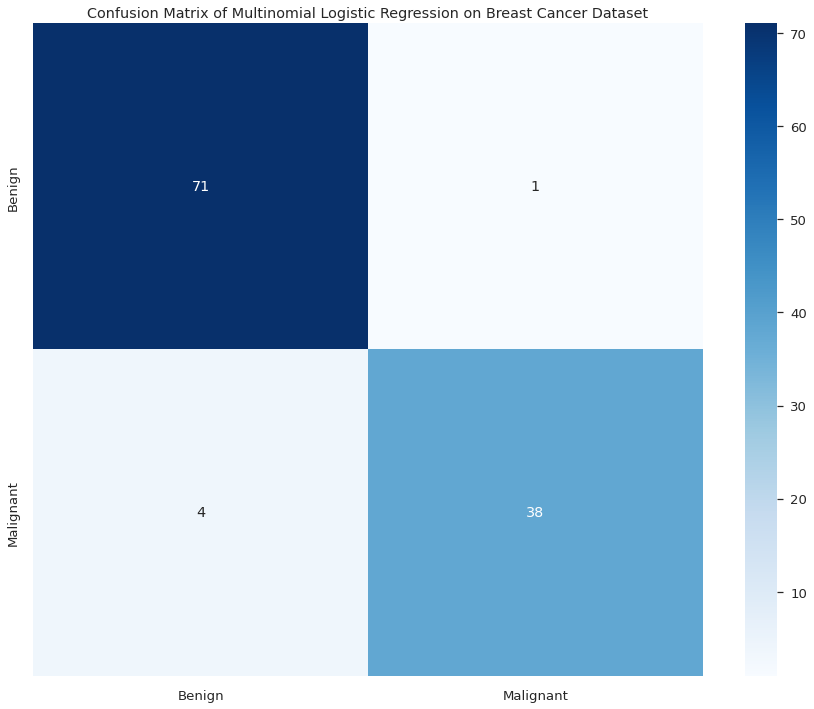

[Operation] Done .


In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import os
import random
import warnings
random.seed(1)
os.environ['PYTHONHASHSEED'] = '0'
warnings.filterwarnings("ignore")
# read data

label = LabelEncoder()
y = label.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)



# shuffle the data because data in series


# Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)

# Spilt the train and test data

# we used 30% test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression(multi_class='multinomial')
# Performing training

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
pred = classifier.predict(X_test)
from sklearn import metrics
print("Multinomial Logistic Regression Model Accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('==============')
print(y_pred.shape)
print(y_pred)
target_name = ['Benign', 'Malignant']
cm = confusion_matrix(y_test , y_pred )
print('Print Classification Report')
CR = classification_report(y_test , y_pred , target_names=target_name)
print(CR)
print('\n')
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Confusion Matrix \n')
print(cm)
print('\n')
print("acc: {:.4f}".format(acc))
print('\n')
print("sensitivity: {:.4f}".format(sensitivity))
print('\n')
print("specificity: {:.4f}".format(specificity))
plt.style.use('seaborn')
plt.figure(figsize=(15,12))
sns.set(font_scale=1.2)
sns.heatmap(cm , cmap='Blues' ,fmt='d' ,annot=True, xticklabels=target_name , yticklabels=target_name)
plt.title('Confusion Matrix of Multinomial Logistic Regression on Breast Cancer Dataset')
# plt.savefig('final/machine/cm-SGDC.png', dpi=800 , bbox_inches='tight')
plt.show()
print('[Operation] Done .')






